1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [131]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [203]:
# First version of the exercise
init_Tl = 1000
init_Pb = 0
Tl_list = [init_Tl]
PB_list = [init_Pb]
tau = 3.052 * 60 #Half-life in seconds
N_steps = 1000

# Define decay rate
decay_rate = np.log(2) / tau

current_Tl = init_Tl
current_Pb = init_Pb
for i in range(N_steps):
    t = i + 1
    # Check amount of Tl atoms that have decayed
    num_atoms_to_Pb = 0
    for a in range(current_Tl):
        if np.random.uniform() < decay_rate:
            num_atoms_to_Pb += 1
    # Update element lists
    current_Tl -= num_atoms_to_Pb
    current_Pb += num_atoms_to_Pb
    Tl_list.append(current_Tl)
    PB_list.append(current_Pb)

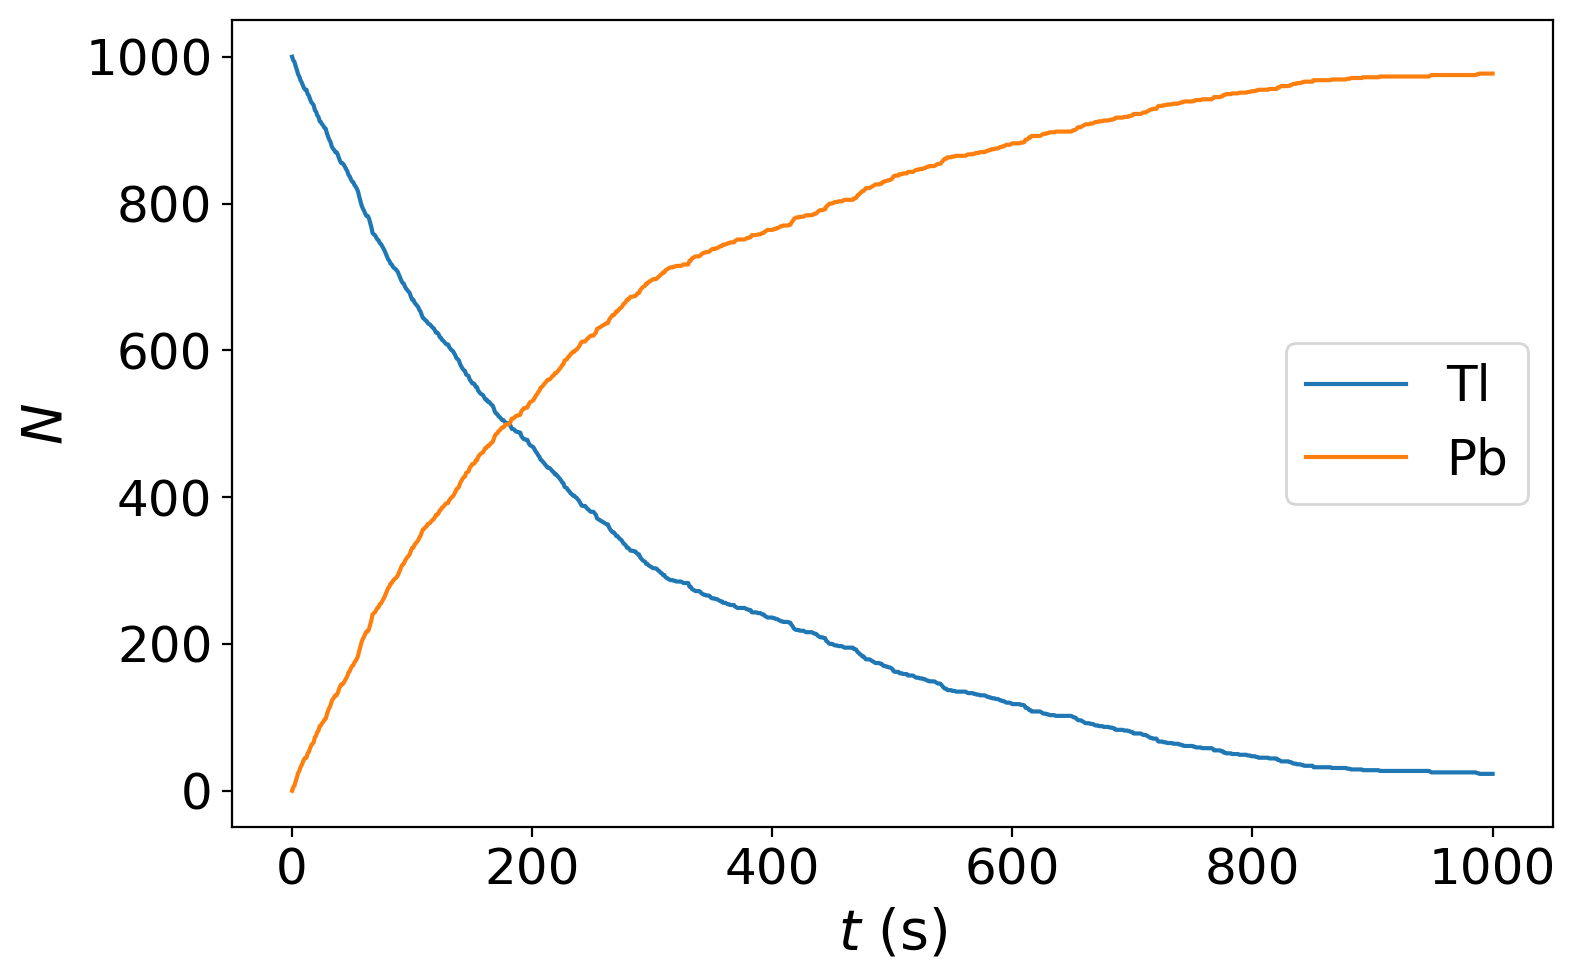

In [204]:
FONTSIZE = 20
fig, ax = plt.subplots(figsize=(8,5), nrows=1, ncols=1, dpi=200)
plt.plot(np.arange(N_steps+1),Tl_list, label='Tl')
plt.plot(np.arange(N_steps+1),PB_list, label='Pb')
plt.xlabel(r'$t$ (s)', fontsize=FONTSIZE)
plt.ylabel(r'$N$', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)
plt.legend(fontsize=FONTSIZE-2)
plt.tight_layout();

In [205]:
# Now the second version
# Define prob. function for t
def prob_t(t):
    return np.power(2, -t/tau) * (np.log(2)/tau)
# Generate dom
t_dom = np.linspace(0,1001, num=1000)
t_probs = prob_t(t_dom)
t_probs = t_probs / np.sum(t_probs)
Tl_decays = np.random.choice(a=t_dom, p=t_probs, size=1000)

# Get number of not decayed atoms
not_decayed_Tl = []
for t in range(1001):
    not_decayed_Tl.append(1000-np.sum(Tl_decays <= t))

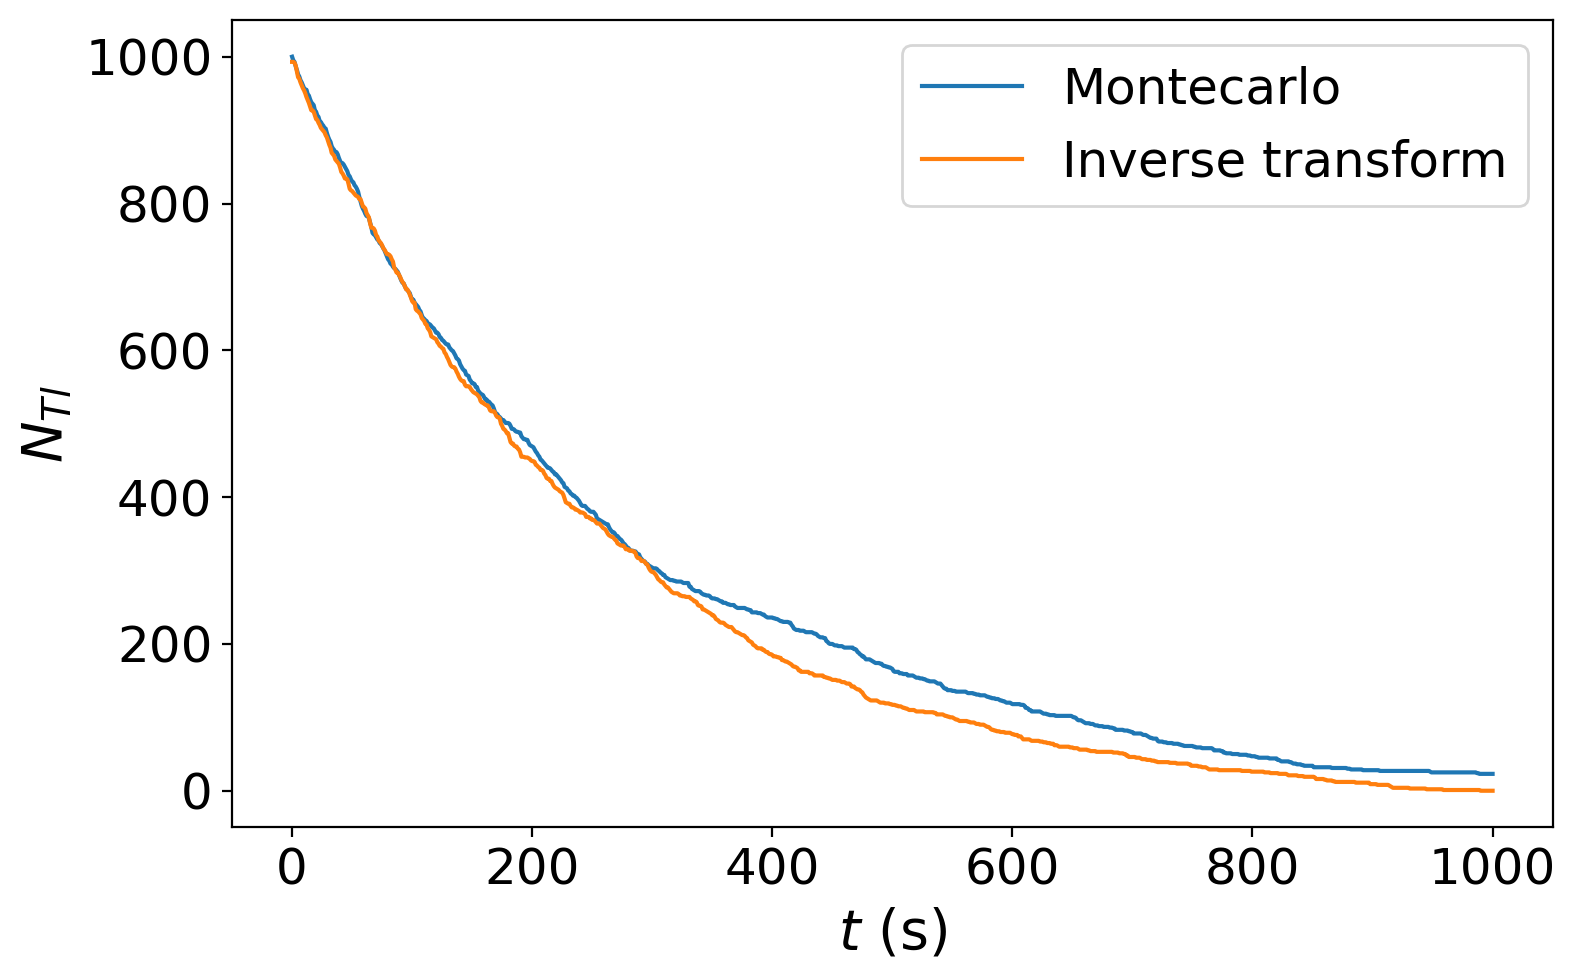

In [206]:
FONTSIZE = 20
fig, ax = plt.subplots(figsize=(8,5), nrows=1, ncols=1, dpi=200)
plt.plot(np.arange(N_steps+1),Tl_list, label='Montecarlo')
plt.plot(np.arange(1001), not_decayed_Tl, label='Inverse transform')
plt.xlabel(r'$t$ (s)', fontsize=FONTSIZE)
plt.ylabel(r'$N_{Tl}$', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)
plt.legend(fontsize=FONTSIZE-2)
plt.tight_layout();

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [208]:
from scipy.constants import epsilon_0, e, physical_constants

In [258]:
# Initialize system parameters
Z = 79
E = 7.7 * 1.60218e-13 # In J
pre_factor = Z*(e**2) / (2*np.pi*epsilon_0*E)

# Initialize beam params
a_0 = physical_constants['Bohr radius'][0]
sigma = a_0 / 100

# Generate b values
N_particles = int(1e6)
b_vals_xy = np.random.multivariate_normal(mean=np.array([0,0]), 
                                       cov=np.array([[sigma**2, 0],
                                                     [0, sigma**2]]),
                                       size=N_particles)
b_vals = np.linalg.norm(b_vals_xy, axis=1)

# Get angles from scattering
theta_vals = 2 * np.arctan(pre_factor * np.power(b_vals,-1))

In [259]:
backscatter_num = np.sum(theta_vals > np.pi/2)
backscatter_frac = backscatter_num / N_particles
print('Backscattering fraction: %.2f%s' % (100*backscatter_frac, '%'))

Backscattering fraction: 0.16%


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [261]:
# Let's define the function
def f(x):
    return np.square(np.sin(np.power(x*(2-x),-1)))

# Let's sample some points from the rectangular region
# that delimits the function
N_shots = int(1e7)
x_samples = np.random.uniform(low=0., high=2., size=N_shots)
y_samples = np.random.uniform(low=0., high=1., size=N_shots)

# Get values f(x) for the x samples
f_vals = f(x_samples)

# Get the area below the function
area_rect = 2
area_f = area_rect * np.sum(f_vals > y_samples) / N_shots
print('Integral of the function with Monte Carlo:', area_f)

Integral of the function with Monte Carlo: 1.4514246


In [262]:
# Now let's try the mean value method
# We can actually use the same x values we have 
# already drawn
I = 2 * np.mean(f(x_samples))
print('Integral of the function with mean-value method:', I)

Integral of the function with mean-value method: 1.4513349447646893


Both methods give reasonable results.

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [272]:
# Monte Carlo method
# Let's generate the samples
N_shots = int(2e7)
x_samples = np.random.uniform(size=N_shots)
y_samples = np.random.uniform(size=N_shots)
r_square_vals = np.square(x_samples) + np.square(y_samples)
area_circ = 4 * np.sum(r_square_vals < 1) / N_shots
print('Area of the unit circle with Monte Carlo:', area_circ)
print('Analytic result:', np.pi)

Area of the unit circle with Monte Carlo: 3.141069
Analytic result: 3.141592653589793


In [282]:
# Now let's generalize it to 10D
# Generate 10 uniform populations
N_shots = int(2e7)
sample_list = []
for i in range(10):
    sample_list.append(np.random.uniform(size=N_shots))
samples_square_10d = np.square(np.stack(sample_list))
r_square_samples_10d = np.sum(samples_square_10d, axis=0)

area_10d = (2**10) * np.sum(r_square_samples_10d < 1) / N_shots

print('Area of the unit 10D sphere with Monte Carlo:', area_10d)
print('Analytic result:', np.power(np.pi,5)/120)

Area of the unit 10D sphere with Monte Carlo: 2.5513984
Analytic result: 2.550164039877345


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

We know that, in this case,

$$f(x) = \frac{x^{-1/2}}{e^x + 1} $$

and,

$$I = \left\langle \frac{f(x)}{w(x)}\right\rangle \int_0^1 w(x)dx 
    \approx \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)} \int_0^1 w(x)dx$$
    
where:

$$\int_0^1 w(x)dx = \left.\left(2x^{1/2}\right)\right|_0^1 = 2$$

In [340]:
# Define our functions
def f(x):
    return np.power(np.sqrt(x)*(np.exp(x)+1), -1)

def w(x):
    return np.power(x, -1/2)

# Define our x samples
N_shots = int(1e6)
x_dom = np.linspace(1e-10, 1., num=N_shots)
x_probs = w(x_dom) / np.sum(w(x_dom))
x_samples = np.random.choice(x_dom, size=N_shots, p=x_probs)

# Get integral of f(x)
I = 2 * np.mean(f(x_samples)/w(x_samples))
print('I =', I)

I = 0.8463753749559549
